# Get the most out of CausalNex plotting

The goal of this tutorial is to help you build pretty and meaningful plots from CausalNex networks. 
We will help you customise your graph for your specific application, whether you seek a specific trend in the network or you wish to use the plotting in a presentation or article.

We will go through the following items:

* Explore customisations available in CausalNex:
    * A huge number of customisations is possible, which can make the existent documentation overwhelming.
    * With examples, we show the main customisations available, and give tips of meaningful choices.
    
* Understand `pyvis`, the engine used in CausalNex visualisations:
    * CausalNex renders visualisation by interacting with a library called [pyvis](https://pyvis.readthedocs.io/en/latest/introduction.html) which is built around [VisJS](https://visjs.github.io/vis-network/docs/network/).
    * We explain the basics of this library and how this interaction takes place.

* Explore alternative solutions:
    * We exemplify how to use `networkx` for plotting. This may be a friendly alternative, as it uses matplotlib to render the images.


## Explore customisations available in CausalNex

In this tutorial, we work with following Bayesian Network structure, known as "Insurance network". This network was first introduced in 
[1](./03_plotting_tutorial.html#References).

Note that we create random weights for each edges. These could mean, in a real model, any indication of the edge strength, such as the weights output by NOTEARS.

In [1]:
import numpy as np
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure
from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")

from itertools import chain

edges = [
    ("Age", "SocioEcon", {"weight": 0.37}),
    ("SocioEcon", "OtherCar", {"weight": 0.95}),
    ("SocioEcon", "GoodStudent", {"weight": 0.73}),
    ("Age", "GoodStudent", {"weight": 0.6}),
    ("SocioEcon", "RiskAversion", {"weight": 0.16}),
    ("Age", "RiskAversion", {"weight": 0.16}),
    ("RiskAversion", "VehicleYear", {"weight": 0.06}),
    ("SocioEcon", "VehicleYear", {"weight": 0.87}),
    ("Accident", "ThisCarDam", {"weight": 0.6}),
    ("RuggedAuto", "ThisCarDam", {"weight": 0.71}),
    ("MakeModel", "RuggedAuto", {"weight": 0.02}),
    ("VehicleYear", "RuggedAuto", {"weight": 0.97}),
    ("Mileage", "Accident", {"weight": 0.83}),
    ("DrivQuality", "Accident", {"weight": 0.21}),
    ("Antilock", "Accident", {"weight": 0.18}),
    ("RiskAversion", "MakeModel", {"weight": 0.18}),
    ("SocioEcon", "MakeModel", {"weight": 0.3}),
    ("RiskAversion", "DrivQuality", {"weight": 0.52}),
    ("DrivingSkill", "DrivQuality", {"weight": 0.43}),
    ("MakeModel", "Antilock", {"weight": 0.29}),
    ("VehicleYear", "Antilock", {"weight": 0.61}),
    ("SeniorTrain", "DrivingSkill", {"weight": 0.14}),
    ("Age", "DrivingSkill", {"weight": 0.29}),
    ("RiskAversion", "SeniorTrain", {"weight": 0.37}),
    ("Age", "SeniorTrain", {"weight": 0.46}),
    ("Theft", "ThisCarCost", {"weight": 0.79}),
    ("CarValue", "ThisCarCost", {"weight": 0.2}),
    ("ThisCarDam", "ThisCarCost", {"weight": 0.51}),
    ("HomeBase", "Theft", {"weight": 0.59}),
    ("AntiTheft", "Theft", {"weight": 0.05}),
    ("CarValue", "Theft", {"weight": 0.61}),
    ("Mileage", "CarValue", {"weight": 0.17}),
    ("MakeModel", "CarValue", {"weight": 0.07}),
    ("VehicleYear", "CarValue", {"weight": 0.95}),
    ("RiskAversion", "HomeBase", {"weight": 0.97}),
    ("SocioEcon", "HomeBase", {"weight": 0.81}),
    ("RiskAversion", "AntiTheft", {"weight": 0.3}),
    ("SocioEcon", "AntiTheft", {"weight": 0.1}),
    ("OtherCarCost", "PropCost", {"weight": 0.68}),
    ("ThisCarCost", "PropCost", {"weight": 0.44}),
    ("Accident", "OtherCarCost", {"weight": 0.12}),
    ("RuggedAuto", "OtherCarCost", {"weight": 0.5}),
    ("Accident", "MedCost", {"weight": 0.03}),
    ("Cushioning", "MedCost", {"weight": 0.91}),
    ("Age", "MedCost", {"weight": 0.26}),
]
g = StructureModel(edges)

We will build, in this tutorial, the following plot for this Bayesian Network:

In [2]:
from IPython.lib.display import IFrame
IFrame( src='supporting_files/03_final_plot.html', width="100%", height="600px")


The customisations in the figure above include:

* We order nodes vertically, according to the causality hierarchy
* The edge thickness is proportional to the weight value assigned to the edge
* Color target variables differently from other variables
* Custom node shapes and title

The representation above makes this graph easier to work with than the out-the-box `causalnex` visualisation (shown below).

In [3]:
viz = plot_structure(g)  # Default CausalNex visualisation
viz.show('supporting_files/03_plot.html')

### Adjusting node and edge attributes
Node and edge attributes can be changed by passing in the desired attributes as dictionaries to the `plot_structure` function.
<br>
One can specify changes that apply to all nodes (edges) as well as node (edge) specific adjustments:
- `all_node_attributes`: node attributes to be applied on all nodes
- `node_attributes`: node attributes to be applied on selected nodes
- `all_edge_attributes`: edge attributes to be applied on all nodes
- `edge_attributes`: edge attributes to be applied on selected edges

#### Nodes
Here, we make the following adjustments to our default structure.

For **all nodes**, we:
1. Change the shape of all nodes to a rectangular box
2. Change the background color of the boxes to a shade of black
3. Set the border colour of each box to a shade of blue
4. Change the font colour of the node labels to white

For **selected nodes**, we:
1. Change the background colour of these nodes as well as the colour when node is selected
2. Change their label names
3. Fix this nodes so that they cannot be moved


A full view of attributes is available at this [link](https://visjs.github.io/vis-network/docs/network/nodes.html).

In [4]:
all_node_attributes = {
    "font": {
        "color": "#FFFFFFD9",
        "face": "Helvetica",
        "size": 20,
    },
    "shape": "box",
    "size": 15,
    "borderWidth": 2,
    "color": {
        "border": "#4a90e2d9",
        "background": "#001521"
    },
    "mass": 3
}

node_attributes = {
    "Accident": {
        "color": {
            "background": "#ff0000",
            "highlight": {
                "background": "#ffcccc",
                "border": "#cce0ff"
            }
        },
        "shape": "circle",
        "size": 50,
        "label": "!!ACCIDENT!!",
        "font": {
            "color": "#000000",
        },
        "fixed": {
            "y": True
        }
    },
    "Age": {
        "color": {
            "background": "#FFD700",
            "highlight": {
                "background": "#ffcccc",
                "border": "#cce0ff"
            }
        },
        "shape": "hexagon",
        "size": 20,
        "fixed": {
            "x": True
        }
    }
}

In [5]:
viz2 = plot_structure(
    g, all_node_attributes=all_node_attributes, node_attributes=node_attributes
)
viz2.show('supporting_files/03_new_node.html')

#### Edges
We will make the following adjustments to our default structure.

For **all nodes**, we:
1. Change the edge colors as well as the color when edge is selected
2. Make edges longer

For **selected nodes**, we:
1. Add labels to edges
2. Add shadows to edges
3. Change layout of the edges (dashed line)

A full view of attributes is available at this [link](https://visjs.github.io/vis-network/docs/network/edges.html).

In [6]:
all_edge_attributes = {
    "color":{
        "color": "#FFFFFFD9",
    },
    "length": 200,
}

edge_attributes = {
    ("SocioEcon", "OtherCar"): {
        "color":{
            "color": "red",
            "highlight": "#79d279", # When selected, edge will change to this color
        },
        "length": 500,
        "shadow": {
            "enabled": True, # This adds a shadow underneath the edge
            "color": "#ffff99" # Choosing the color of the shadow
        },
    },
    ("Mileage", "Accident"): {
        "label": "this is an edge label",
        "font": {
            "color": 'green',
            "size": 10
        }
    },
    ("Age", "MedCost"): {
        "color": "blue",
        "dashes": True # Turns edges into a dashed line
    }, 
}

In [7]:
viz3 = plot_structure(
    g, all_edge_attributes=all_edge_attributes, edge_attributes=edge_attributes
)
viz3.show('supporting_files/03_new_edges.html')

### Choosing a look for your plot
In pyvis, the arrangement of the nodes and the look of the plot are determined by two parameters: `physics` and `layout`. 

`physics` handles the arrangement of the nodes via in-built gravity models, having options like `barnesHut`, `forceAtlas2Based`, `repulsion` and `hierarchicalRepulsion`. More details about each option, together with their corresponding settings, can be found in the [documentation](https://visjs.github.io/vis-network/docs/network/physics.html).

> The default physics engine is `barnesHut` for non-hierarchical plots and `hierarchicalReplusion` for hierarchical plots.

To switch the type of physics engine, we can simply make use of the `set_options` method provided by `pyvis`. We can apply `set_options` on our graph returned by `plot_structure`. We prepare a dictionary of our desired options and provide them as input to `physics` under the argument `options`.
For each of the available physics engine, we can easily customise them by modifying their associated options. 

Let's pick `repulsion` as our choice of physics engine for illustration.

In [8]:
import json

opt = {
    "physics": {
       "solver": "repulsion",
       "repulsion": {
           "nodeDistance": 400,
           "springLength": 100,
           "springConstant": 0.5
       }
   }
} # you can switch the options here

viz4 = plot_structure(g)
viz4.set_options(options=json.dumps(opt))
viz4.show('supporting_files/03_new_physics.html')

For Bayesian networks, it may be useful to look at the hierarchical structure of your network to better visualise the interaction between nodes. To allow a hierarchical layout for your plot, we simply prepare a dictionary of our desired layout options and provide them as input to `lauyout` under the argument `options`. Likewise, there are many associated options with the hierarchical layout. A full view is available at this [link](https://visjs.github.io/vis-network/docs/network/layout.html).

In the following example, we enable the hierarchical layout and set the display of the tree to be from parent to children nodes in the left to right direction.

In [9]:
import json
from causalnex.plots import EDGE_STYLE, NODE_STYLE

opt = {
    "layout": {
        "hierarchical": {
        "enabled": True,
        "direction": "LR", #LR means that the hierarchy is displayed left to right
        "sortMethod": "directed"
        }
    }
}  

viz5 = plot_structure(
    g,     
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz5.set_options(options=json.dumps(opt))
viz5.show('supporting_files/03_new_hierarchical.html')

### Parameters that cannot be changed through `set_options`
Some parameters are set within the `plot_structure` function as they are necessary for initialising the `pyvis.network.Network` object. 
In order to change those parameters we cannot rely on the `set_options` method but they must be passed in `plot_structure` under the argumetn `plot_options`.
<br>
Please refer to the Pyvis documentation [documentation on pyvis](https://pyvis.readthedocs.io/en/latest/documentation.html) for a full list of parameters.

For example, to change the background color of our graph we pass in a dictionary and set the desired background color under `"bgcolor"`.

In [10]:
import json
from causalnex.plots import EDGE_STYLE, NODE_STYLE

plot_options = {
    "bgcolor": "grey"
}  

viz6 = plot_structure(
    g,     
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    plot_options=plot_options
)
viz6.show('supporting_files/03_new_background_color.html')

### How to customise your layout
In order to change properties of this plot, we pass network, nodes and edges attributes. Attributes include the heading of the graph, the color or shape of node and the thickness of an edge.

* Network attributes are passed as a dictionary `{attribute: value}`.
* Node attributes are of the form `{node: {attribute: value}}`, i.e., for each node, we pass a dictionary of attributes
* Edge attibutes are of the form `{(node_from, node_to): {attribute: value}}`.
* The full list of attributes you can set can be found in Pyvis [documentation on network](https://visjs.github.io/vis-network/docs/network/). Since this is an extensive list, we only the main attributes and their meaning in the table below.

A list of useful network, node and edge attributes:

#### Main Network Attributes

| Attribute       | Description                                   | values                                                                                                                                                                                                                                                                                                                                        |
| --------------- | --------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `height`        | Height of the canvas.                         | `string` with value either in percentages (`"100%"`) or pixels (`"400px"`)                                                                                                                                                                                                                                                                    |
| `width`         | Width of the canvas.                          | `string` with value either in percentages (`"100%"`) or pixels (`"400px"`)                                                                                                                                                                                                                                                                    |
| `directed`      | Whether or not to use a directed graph.       | `"True"` or `"False"`                                                                                                                                                                                                                                                                                                                         |
| `notebook`      | Whether or not using Jupyter notebook.        | `"True"` or `"False"`                                                                                                                                                                                                                                                                                                                         |
| `bgcolor`       | Background colour of the canvas.              | RGB, HSV or colour name (`black`, `blue` …)                                                                                                                                                                                                                                                                                                   |
| `font_color`    | Colour of the node labels text.               | `"False"` or RGB, HSV or colour name (`black`, `blue` …). If RGB HSV or colour name is given, plot will ignore subsequent font colour settings in node. To avoid this, value can be set to `"False"`.                                                                                                                                         |
| `heading`       | Heading for the overall graph.                | `string`                                                                                                                                                                                                                                                                                                                                      |
| `cdn_resources` | Where to pull resources for css and js files. | `local` to pull resources from local lib folder, `in_line` to insert lib resources as inline script tags or `remote` to pull resources from hash checked cdns. When set to `local` with `notebook=True`, Jupyter notebook has issues displaying graphics on Chrome/Safari. Use `cdn_resources="in_line"` or `cdn_resources="remote"` instead. |

#### Main Node Attributes

| Attribute       | Description                                                          | values                                                                                                                                                                                                                                                                                                                                                                           |
| --------------- | -------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `borderWidth` | Width of the border of the node.                                     | `double`                                                                                                                                                                                                                                                                                                                                                                       |
| `color`       | Colour information of the node.                                      | RGB, HSV or colour name (`black`, `blue` ...).<br>If border and node colour are different, supply object with `border` to set node border colour and `background` to set node background colour instead.                                                                                                                                                                 |
| `font`        | Font information of the node labels.                                 | `string` in shorthand form of `"size face color"` (e.g., `"14px arial red"`) or an object with keys `size`, `face`, `color` etc can be specified.                                                                                                                                                                                                                    |
| `shape`       | Shape of the node.                                                   | `string`. There are three types of nodes:<br>* Types with labels inside: `ellipse`, `circle`, `database`, `box`, `text`<br>* Types with labels outside: `image`, `circularImage`, `diamond`, `dot`, `star`, `triangle`, `triangleDown`, `hexagon`, `square`, `icon`<br>* `custom` shape can also be created with the `ctxRenderer` option |
| `size`        | Size to determine node shapes that do not have label inside of them. | `int`                                                                                                                                                                                                                                                                                                                                                                          |
| `value`       | Size of node to allow nodes to be scaled accordingly.                | `double`                                                                                                                                                                                                                                                                                                                                                                       |
| `label`       | Piece of text shown in or under the node, depending on the shape.    | `string`                                                                                                                                                                                                                                                                                                                                                                       |
| `fixed`       | When `True`, the node will not move in the X/Y direction.          | `string`. If only meaning to fixate in one direction, supply object with `x`, `y`, respectively, to prevent node from moving in either direction.                                                                                                                                                                                                                          |

#### Main Edge Attributes

| Attribute                                               | Description                                                    | values                                                                                                                                                                                                                                                                        |
| ------------------------------------------------------- | -------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `arrows`                                              | To draw an arrow with default settings or with customisations  | `string` (e.g. "to, from, middle" or "to; from") to use default settings<br>`object` to use with customisations                                                                                                                                                           |
| `arrows.to`,<br>`arrows.middle`,<br>`arrows.from` | To set the location and size of the arrowhead.                 | If set to `True`, arrowhead will be set to the corresponding side of edge with default settings.<br>For customisation, supply dictionary of parameters like `enabled` to toggle arrow on or off, `scaleFactor` to change size or `type` to select preferred endpoint. |
| `endPointOffset`                                      | To adjust the endpoints of the arrows.                         | Supply dictionary of parameters like `from` and `to` to adjust endpoint nearer/further away from node's midpoint                                                                                                                                                          |
| `color`                                               | Colour of the edge.                                            | RGB HSV or colour name.<br>If further customisations like `highlight` or `opacity` is required, supply dictionary.                                                                                                                                                        |
| `length`                                              | Spring length of edge.                                         | `double`                                                                                                                                                                                                                                                                    |
| `value`                                               | Width of edge to allow edges to be scaled accordingly.         | `double`                                                                                                                                                                                                                                                                    |
| `width`                                               | Width of edge.                                                 | `double`<br>If `value` is supplied, edges' width will be scaled using that instead.                                                                                                                                                                                       |
| `label`                                               | Label of edge.                                                 | `string`                                                                                                                                                                                                                                                                    |
| `font`                                                | Font information of the edge labels.                           | `string` in shorthand form of `"size face color"` (e.g., `"14px arial red"`)  or an object with keys `size`, `face`, `color` etc can be specified.                                                                                                                |
| `dashes`                                              | When set to `True`, the edge will be drawn as a dashed line. | `boolean`                                                                                                                                                                                                                                                                   |

#### Example of changing parameters

As an example of how much of the visualisation can be customised, we use almost almost all the attributes from the table above to modify the visualisation. The result is purposely not pleasing, but shows how to obtain a very high level of control over the plot.

In [11]:
# Changing attributes of specific nodes
node_attributes = {
    "Age": {  # We change the attributes of the node "Age"
        "shape": "square",
        "borderWidth": 1,
        "color": "#4a90e2d9",
    },
    "Mileage": {
        "shape": "hexagon",
        "color": "green",
    },
    "Cushioning": {
        "shape": "star",
        "label": "This is a star",  # Label overwrites the default name
    },
    "SeniorTrain": {
        "shape": "diamond",
        "borderWidth": 10,
    },
    "Theft": {
        "shape": "image", # provide the link to the image and pass it under 'image'
        "image": "https://raw.githubusercontent.com/quantumblacklabs/causalnex/develop/docs/source/03_tutorial/supporting_files/cat.jpeg",
        "size": 40
    }
}

# Changing attributes of specific edges
edge_attributes = {
    ("SocioEcon", "OtherCar"): {"color": "red"},  # setting the label color
    ("Mileage", "Accident"): {"label": "this is an edge label",
                             "font": "20px arial chocolate"},
    ("SocioEcon", "GoodStudent"): {"color": "blue"},
    ("SocioEcon", "VehicleYear"): {"width": 30},  # Thickness of edge
}

plot_options = {"bgcolor": "orange"}

viz7 = plot_structure(
    g,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    plot_options=plot_options
)

viz7.show('supporting_files/03_ugly.html')

#### Optimising the network design
The next step is to use all this customisation power to actually make the visualisation more appealing and meaningful. The result could easily be used in applications such as presentations or papers, with only minor post processing, if any.

Among the customisations made in the plot below, we emphasise the following:

* Color target variables differently from other nodes
* Use edge weights (or any meaningful quantitative value related to an edge) to set the thickness of an edge.
* Choose wisely the layout (in this case dot) that suits your application, and the parameters to allocate the nodes


In [12]:
all_node_attributes = {
    "font": {
        "color": "#FFFFFFD9",
        "face": "Helvetica",
        "size": 20,
    },
    "shape": "hexagon",
    "borderWidth": 3,
    "color": {
        "border": "#4a90e2d9",
        "background": "grey",
        "highlight": {
            "border": "#0059b3",
            "background": "#80bfff"
        }
    },
    "mass": 3
}

# Target nodes (ones with "Cost" in the name) are colored differently
cost_nodes = [node for node in g.nodes if 'Cost' in node]
cost_nodes

node_attributes = {
    node: {
        "color": {
            "background": "#DF5F00"
        },
    } for node in cost_nodes
}

# Splitting two words with "\n"
index_to_split = {
    node: [i for i, c in enumerate(node) if c.isupper()][-1]
    for node in g.nodes
}

node_label_attributes = {
    node: {
        "label": node[:index_to_split[node]] + "\n" + node[index_to_split[node]:] 
        if index_to_split[node] > 0 else node[index_to_split[node]:] 
    } for node in g.nodes
}

# update nodes_attributes
for node in g.nodes:
    if node in node_attributes.keys():
        node_attributes[node].update(node_label_attributes[node])
    else:
        node_attributes[node] = node_label_attributes[node]

all_edge_attributes = {
    "color":{
        "color": "#FFFFFFD9",
        "highlight": "#4a90e2d9",
    },
    "length": 100,
}


# Customising edges
# Scale them to be thinner
edge_attributes = {
    (u, v): {
        "width": int(10 * w),  # Scale edge width according to their weight
    }
    for u, v, w in g.edges(data="weight")
}

opt = {
    "layout": 
        {
            "hierarchical": {
                "enabled": True,
                "direction": "UD", #UD means that the hierarchy is displayed up to down
                "sortMethod": "directed",
                "nodeSpacing": 200, 
                "treeSpacing": 150, 
                "levelSeparation": 100, 
            }
        },
    "physics": 
       {
           "solver": "hierarchicalRepulsion",
               "hierarchicalRepulsion": {
               "nodeDistance": 250,
               "springLength": 100,
               "springConstant": 0.1,
               "centralGravity": 0,
           }
       },
}  
viz8 = plot_structure(
    g,
    all_node_attributes=all_node_attributes,
    all_edge_attributes=all_edge_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
viz8.set_options(options=json.dumps(opt))
viz8.show('supporting_files/03_final_plot.html')

## Alternative solutions

### Plotting with `networkx`

Since a `CausalNex`'s `StructureModel` is an extension of `networkx` graphs, we can easily use `networkx` to plot our structures.

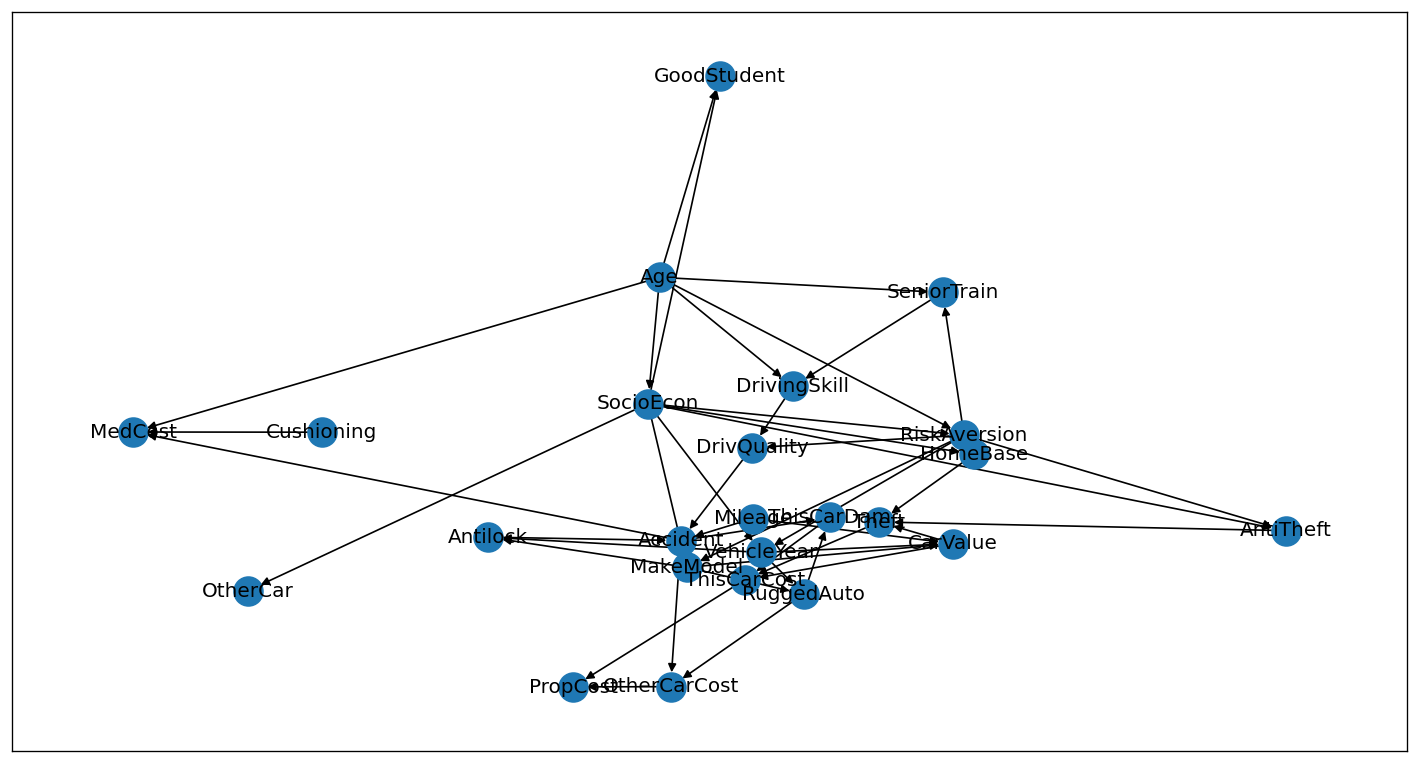

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 120

fig = plt.figure(figsize=(15, 8))  # set figsize
nx.draw_networkx(g)
plt.show()

Advantages of using `networkx`:

* Plotting with `networkx` can be much simpler since it uses `matplotlib` to create the graph. Anyone familiar with `matplotlib` can use it to customise the graph to his/her needs.
* We have much more control over the image since we have all `matplotlib` functionality available. We can, for example, easily change the positions of a node by hand.
* Documentation is more readable, since it is purely in Python.

Disadvantages:

* Features like splines on edges, gradient colored edges are not readily available in `networkx`.
* Layouts in Pyvis tend to produce better node positions. 
* `networkx` images may need fine tuning in the end.

We exemplify below how to obtain, with `networkx`, similar plots to what we got with `plot_structure`.


In [14]:
### run a layout algorithm to set the position of nodes
# pos = nx.drawing.layout.circular_layout(g) # various layouts available
# pos = nx.drawing.layout.kamada_kawai_layout(g)
# pos = nx.drawing.layout.planar_layout(g)
# pos = nx.drawing.layout.random_layout(g)
# pos = nx.drawing.layout.rescale_layout(g)
# pos = nx.drawing.layout.shell_layout(g)
pos = nx.drawing.layout.spring_layout(g, seed=0)
# pos = nx.drawing.layout.spectral_layout(g)
# pos = nx.drawing.layout.spiral_layout(g)
# pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
# pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="dot")

pos

{'Age': array([-0.1156687 ,  0.52073627]),
 'SocioEcon': array([-0.26498101,  0.27637484]),
 'OtherCar': array([-0.85757751,  0.35456912]),
 'GoodStudent': array([-0.16758151,  1.        ]),
 'RiskAversion': array([-0.01608799,  0.0352858 ]),
 'VehicleYear': array([-0.08594314, -0.20117656]),
 'Accident': array([ 0.13881838, -0.24496715]),
 'ThisCarDam': array([ 0.15971475, -0.45618066]),
 'RuggedAuto': array([ 0.03308099, -0.32719595]),
 'MakeModel': array([-0.28513872, -0.11216075]),
 'Mileage': array([ 0.10186333, -0.15299145]),
 'DrivQuality': array([-0.13971029, -0.02112685]),
 'Antilock': array([-0.15987361, -0.25117089]),
 'DrivingSkill': array([-0.30032307,  0.09292107]),
 'SeniorTrain': array([-0.42573094,  0.31731686]),
 'Theft': array([ 0.15574209, -0.18984148]),
 'ThisCarCost': array([ 0.21964653, -0.34602757]),
 'CarValue': array([ 0.04859493, -0.18241035]),
 'HomeBase': array([ 0.06689539, -0.05314831]),
 'AntiTheft': array([ 0.51730348, -0.16245643]),
 'OtherCarCost': ar

In [15]:
# We can change the position of specific nodes
pos["Cushioning"] = (-0.1, 0.7)
pos["SeniorTrain"] = (0.1, -0.7)

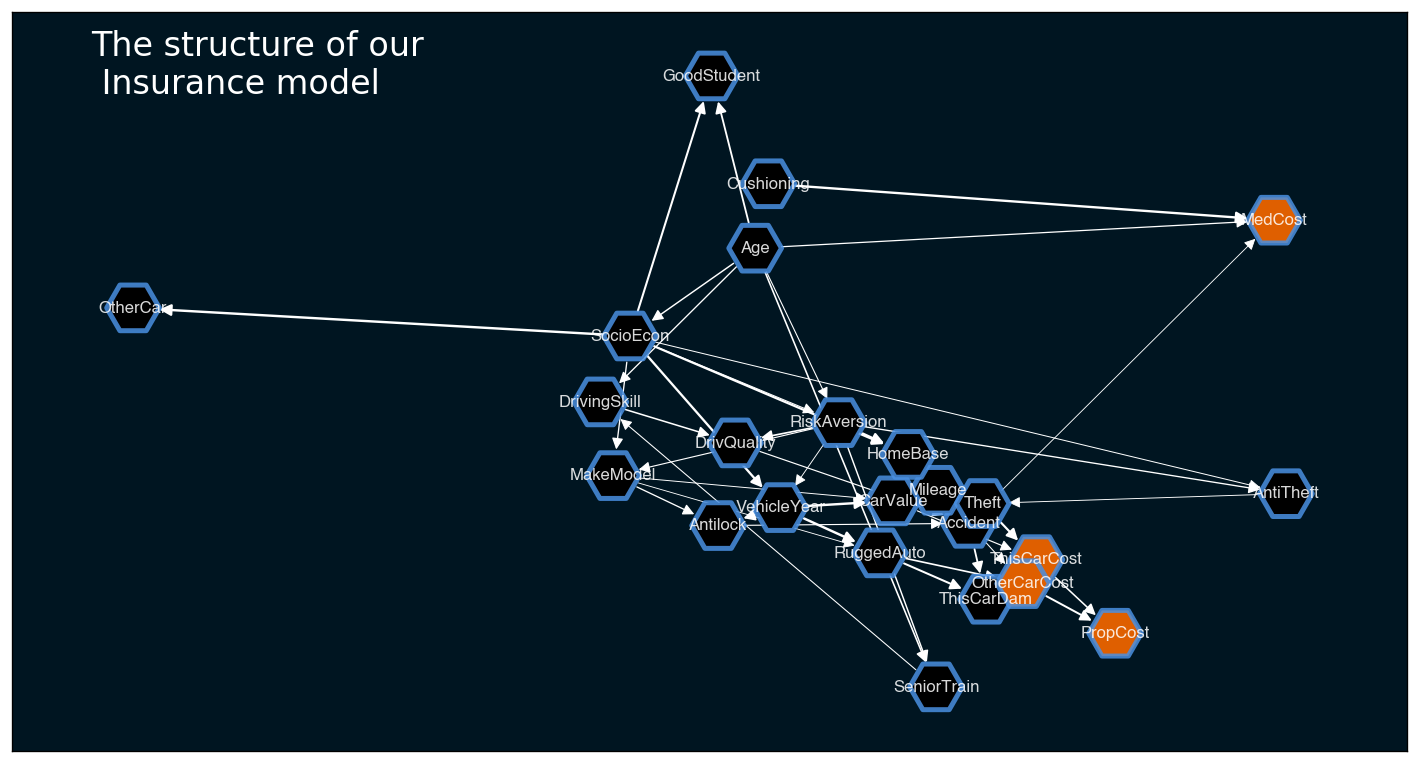

In [16]:
fig = plt.figure(figsize=(15, 8))  # set figsize
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#001521")  # set backgrount

# add nodes to figure
nx.draw_networkx_nodes(
    g,
    pos,
    node_shape="H",
    node_size=1000,
    linewidths=3,
    edgecolors="#4a90e2d9",
    node_color=["black" if "Cost" not in el else "#DF5F00" for el in g.nodes],
)
# add labels
nx.draw_networkx_labels(
    g,
    pos,
    font_color="#FFFFFFD9",
    font_weight="bold",
    font_family="Helvetica",
    font_size=10,
)
# add edges
nx.draw_networkx_edges(
    g,
    pos,
    edge_color="white",
    node_size=1000,
    arrowsize=14,
    width=[w + 0.5 for _, _, w, in g.edges(data="weight")],
)

x = min([pos[node][0] for node in pos.keys()])-0.05
y = max([pos[node][1] for node in pos.keys()])-0.05

plt.text(x, y, "The structure of our\n Insurance model", color="white", size=20)
plt.show()

### Manual adjustment
Node positions can be adjusted manually to obtain the desired graph.
In the following we will try to recreate the graph we obtained using `pyvis`.

In [17]:
pos = nx.drawing.layout.spring_layout(g, seed=0)
pos

{'Age': array([-0.1156687 ,  0.52073627]),
 'SocioEcon': array([-0.26498101,  0.27637484]),
 'OtherCar': array([-0.85757751,  0.35456912]),
 'GoodStudent': array([-0.16758151,  1.        ]),
 'RiskAversion': array([-0.01608799,  0.0352858 ]),
 'VehicleYear': array([-0.08594314, -0.20117656]),
 'Accident': array([ 0.13881838, -0.24496715]),
 'ThisCarDam': array([ 0.15971475, -0.45618066]),
 'RuggedAuto': array([ 0.03308099, -0.32719595]),
 'MakeModel': array([-0.28513872, -0.11216075]),
 'Mileage': array([ 0.10186333, -0.15299145]),
 'DrivQuality': array([-0.13971029, -0.02112685]),
 'Antilock': array([-0.15987361, -0.25117089]),
 'DrivingSkill': array([-0.30032307,  0.09292107]),
 'SeniorTrain': array([-0.42573094,  0.31731686]),
 'Theft': array([ 0.15574209, -0.18984148]),
 'ThisCarCost': array([ 0.21964653, -0.34602757]),
 'CarValue': array([ 0.04859493, -0.18241035]),
 'HomeBase': array([ 0.06689539, -0.05314831]),
 'AntiTheft': array([ 0.51730348, -0.16245643]),
 'OtherCarCost': ar

In [18]:
pos['Age'] = (0.2, 1.)

pos['SocioEcon'] = (-0.1, 0.78)

pos['RiskAversion'] = (0.4, 0.56)

pos['SeniorTrain'] = (0.15, 0.34)

pos['VehicleYear'] = (-0.5, 0.12)
pos['MakeModel'] = (-0.05, 0.12)
pos['DrivingSkill'] = (0.6, 0.12)


pos['DrivQuality'] = (-0.2, -0.12)
pos['Mileage'] = (-0.9, -0.12)
pos['Antilock'] = (0.2, -0.12)


pos['Accident'] = (-0.7, -0.34)
pos['RuggedAuto'] = (-0.5, -0.34)
pos['CarValue'] = (0, -0.34)
pos['HomeBase'] = (0.5, -0.34)
pos['AntiTheft'] = (0.8, -0.34)

pos['ThisCarDam'] = (-1, -0.56)
pos['Theft'] = (0.2, -0.56)

pos['ThisCarCost'] = (-0.55, -0.78)
pos['OtherCarCost'] = (-0.15, -0.78)
pos['Cushioning'] = (1, -0.78)


pos['OtherCar'] = (-0.8, -1.)
pos['GoodStudent'] = (-0.3, -1.)
pos['PropCost'] = (0.15, -1.)
pos['MedCost'] = (0.45, -1.)


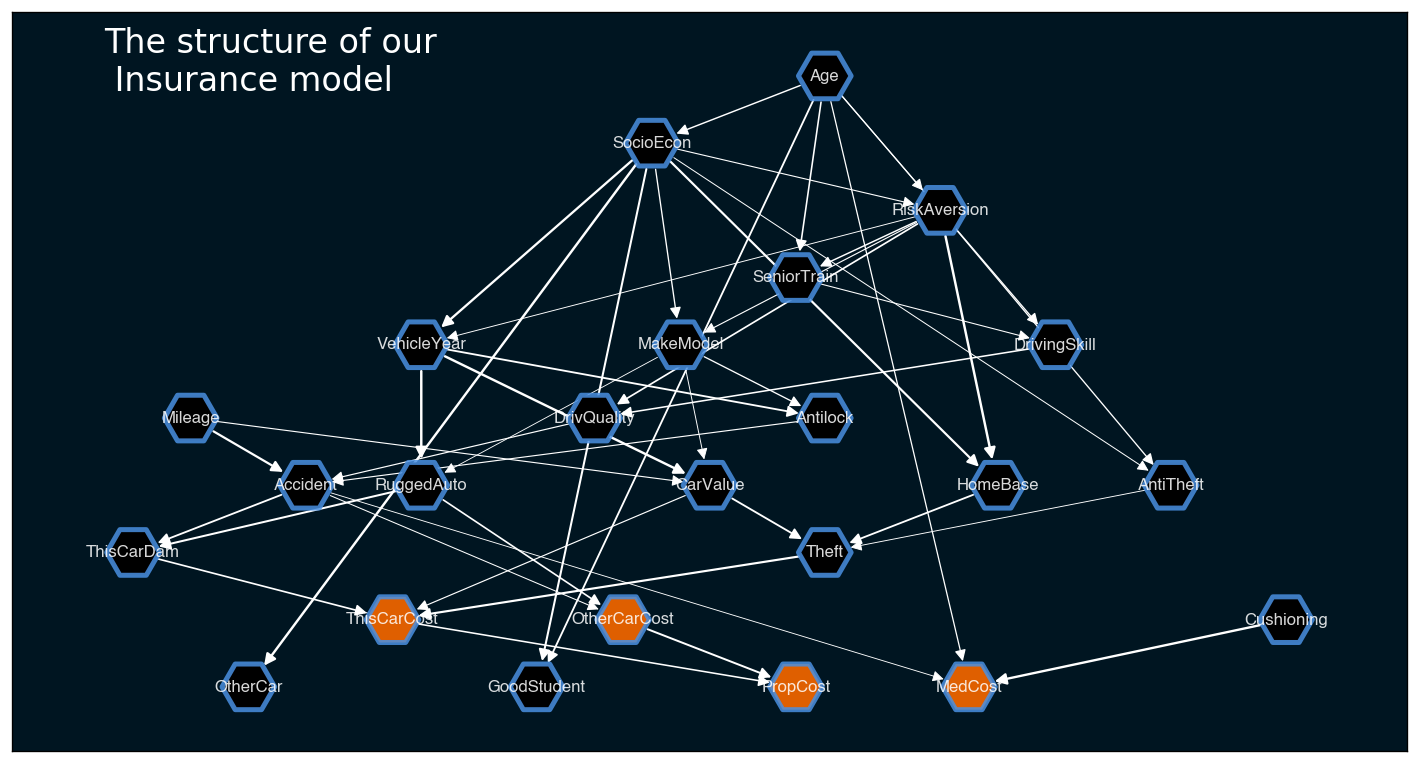

In [19]:
fig = plt.figure(figsize=(15, 8))  # set figsize
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#001521")  # set backgrount

# add nodes to figure
nx.draw_networkx_nodes(
    g,
    pos,
    node_shape="H",
    node_size=1000,
    linewidths=3,
    edgecolors="#4a90e2d9",
    node_color=["black" if "Cost" not in el else "#DF5F00" for el in g.nodes],
)
# add labels
nx.draw_networkx_labels(
    g,
    pos,
    font_color="#FFFFFFD9",
    font_weight="bold",
    font_family="Helvetica",
    font_size=10,
)
# add edges
nx.draw_networkx_edges(
    g,
    pos,
    edge_color="white",
    node_size=1000,
    arrowsize=14,
    width=[w + 0.5 for _, _, w, in g.edges(data="weight")],
)

x = min([pos[node][0] for node in pos.keys()])-0.05
y = max([pos[node][1] for node in pos.keys()])-0.05

plt.text(x, y, "The structure of our\n Insurance model", color="white", size=20)
plt.show()

The plot we got with `plot_structure`:

In [20]:
viz8.show('supporting_files/03_final_plot.html')

## References

[1] [pyvis read the Docs](https://pyvis.readthedocs.io/en/latest/index.html)
<br>
[2] [network documentation](https://visjs.github.io/vis-network/docs/network/index.html)